In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040460.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

         0         1         2         3         4         5         6  \
0  0.57869  0.560117  0.542522  0.524927  0.506354  0.486804  0.467253   

          7        8       9  ...      4192      4193      4194      4195  \
0  0.449658  0.43304  0.4174  ...  0.397849  0.396872  0.395894  0.393939   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.391984  0.390029  0.387097  0.385142    119.046265      68.032074  

[1 rows x 4202 columns]
[119.04626464]  /  [68.03207378]
         0         1         2         3         4         5         6  \
0  0.57869  0.560117  0.542522  0.524927  0.506354  0.486804  0.467253   

          7        8       9  ...      4190      4191      4192      4193  \
0  0.449658  0.43304  0.4174  ...  0.399804  0.398827  0.397849  0.396872   

       4194      4195      4196      4197      4198      4199  
0  0.395894  0.393939  0.391984  0.390029  0.387097  0.385142  

[1 rows x 4200 columns]


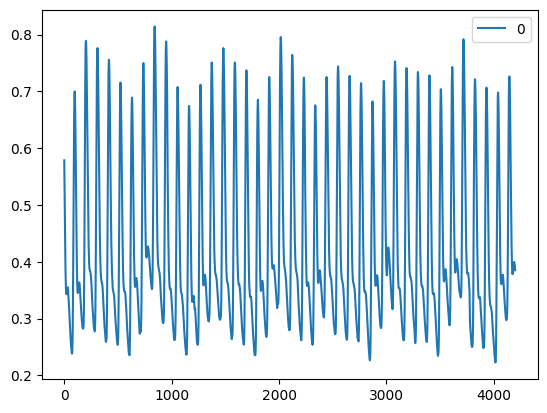

In [398]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [399]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

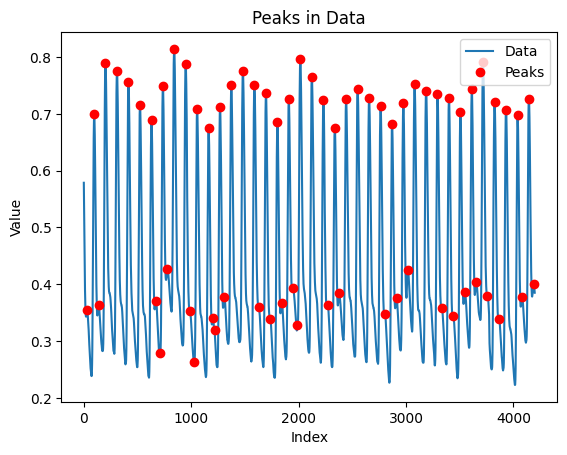

{'indices': array([  31,   97,  139,  201,  309,  416,  523,  631,  670,  706,  736,
        779,  842,  949,  988, 1026, 1055, 1162, 1203, 1217, 1268, 1308,
       1373, 1481, 1588, 1628, 1696, 1736, 1803, 1844, 1909, 1950, 1987,
       2016, 2123, 2231, 2270, 2337, 2379, 2442, 2550, 2657, 2764, 2802,
       2870, 2912, 2976, 3017, 3080, 3187, 3293, 3332, 3400, 3439, 3507,
       3549, 3613, 3653, 3717, 3758, 3825, 3868, 3932, 4039, 4082, 4145,
       4189]), 'values': array([0.35483871, 0.69990225, 0.36363636, 0.7888563 , 0.77614858,
       0.75562072, 0.71554252, 0.68914956, 0.3714565 , 0.27956989,
       0.74975562, 0.42717498, 0.81427175, 0.78787879, 0.35288368,
       0.26392962, 0.70772239, 0.6744868 , 0.34017595, 0.31867058,
       0.71163245, 0.3773216 , 0.75073314, 0.77614858, 0.75073314,
       0.36070381, 0.7370479 , 0.33919844, 0.68523949, 0.36656891,
       0.72531769, 0.39393939, 0.32844575, 0.79569892, 0.76441838,
       0.72434018, 0.36363636, 0.67546432, 0.38514174, 0

In [400]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [401]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, 0.6999022482893451, None, 0.7888563049853372, 0.7761485826001955, 0.7556207233626588, 0.7155425219941349, 0.6891495601173021, None, None, 0.7497556207233627, None, 0.8142717497556208, 0.7878787878787878, None, None, 0.70772238514174, 0.6744868035190615, None, None, 0.7116324535679375, None, 0.750733137829912, 0.7761485826001955, 0.750733137829912, None, 0.7370478983382209, None, 0.6852394916911045, None, 0.7253176930596286, None, None, 0.7956989247311828, 0.7644183773216031, 0.7243401759530792, None, 0.6754643206256109, None, 0.7253176930596286, 0.7438905180840665, 0.7272727272727273, 0.7145650048875856, None, 0.6823069403714564, None, 0.718475073313783, None, 0.7526881720430108, 0.7409579667644184, 0.7341153470185728, None, 0.7282502443792767, None, 0.7038123167155426, None, 0.7429130009775171, None, 0.7917888563049853, None, 0.7214076246334311, None, 0.7067448680351907, 0.6979472140762464, None, 0.7262952101661779, None]
[0.3548387096774194, None, 0.3636363636363636, None, Non

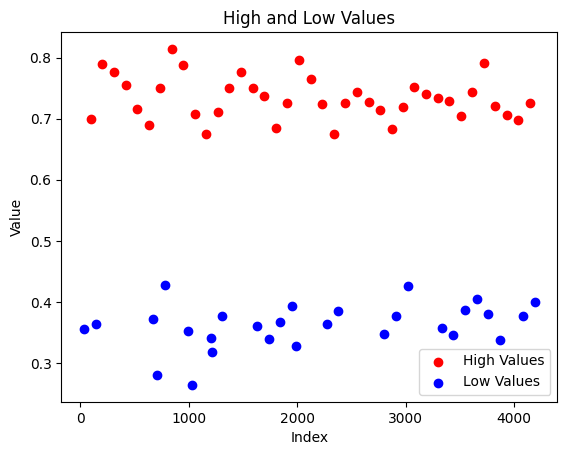

In [402]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [403]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7337143143594757
Average Low Value: 0.3616813294232649
